In [2]:
import numpy as np
import pandas as pd

In [60]:
df = pd.read_csv("C:\\Users\\ABHAS\\Downloads\\temp\\old projects and trash\\digit Recognizer\\digit-recognizer\\train.csv")

In [61]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape[1]

785

In [91]:
data_train = df.iloc[:,1:]
data_train_label = df.iloc[:,0]

In [92]:
data_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
nnewl = np.array(data_train.iloc[5][:].tolist())

In [8]:
all = nnewl.reshape(28,28)

In [7]:
import matplotlib.pyplot as plt

In [8]:
master = []
for i in range(data_train.shape[0]):
    master.append(data_train.iloc[i].tolist())

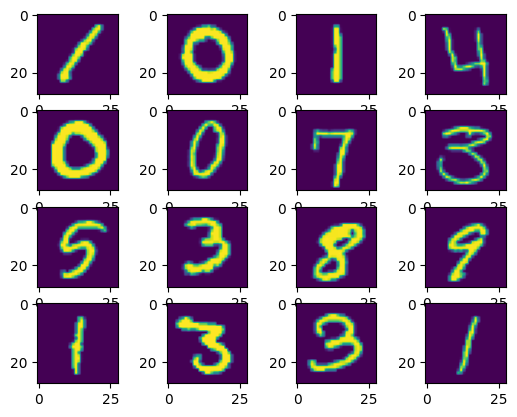

In [9]:
# np.random.shuffle(master)
for i in range(16):
        plt.subplot(4,4,i+1)
        img = np.array(master[i])
        img = img.reshape(28,28)
        plt.imshow(img)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train , X_test , y_train , y_test = train_test_split(data_train,data_train_label,train_size=0.8,random_state=42,shuffle=True)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
from sklearn.svm import SVC

In [16]:
svc = SVC()
svc.fit(X=X_train,y=y_train)

SVC()

In [17]:
lr = LogisticRegression()
lr.fit(X=X_train,y=y_train)

c:\Users\ABHAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
pred_lr = lr.predict(X_test)

In [19]:
pred_svc = svc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_true=y_test,y_pred=pred_lr)

0.9183333333333333

In [22]:
accuracy_score(y_true=y_test,y_pred=pred_svc)

0.973452380952381

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X=X_train,y=y_train)
pred_knn = knn.predict(X_test)

In [25]:
accuracy_score(y_true=y_test,y_pred=pred_knn)

0.9644047619047619

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier(max_depth=100)
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)

In [28]:
accuracy_score(y_pred=pred_rf,y_true=y_test)

0.9629761904761904

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
scaled_trained_data = scaler.fit_transform(data_train)

In [26]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_trained_data,data_train_label,random_state=42,train_size=0.75)

In [32]:
lr1 = LogisticRegression()
lr1.fit(X_train_scaled,y_train_scaled)
scaled_pred = lr1.predict(X_test_scaled)

c:\Users\ABHAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
accuracy_score(y_pred=scaled_pred,y_true=y_test_scaled)

0.9203809523809524

In [34]:
rf1 = RandomForestClassifier()
rf1.fit(X_train_scaled,y_train_scaled)
scaled_pred_rf = rf1.predict(X_test_scaled)

In [35]:
svm1 = SVC()
svm1.fit(X_train_scaled,y_train_scaled)
scaled_pred_svm = svm1.predict(X_test_scaled)

In [36]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train_scaled,y_train_scaled)
scaled_pred_knn = knn1.predict(X_test_scaled)

After using MinMax Scaler

In [37]:
print("accuracy_score of knn ",accuracy_score(y_pred=scaled_pred_knn,y_true=y_test_scaled))
print("accuracy_score of svc ",accuracy_score(y_pred=scaled_pred_svm,y_true=y_test_scaled))
print("accuracy_score of lr ",accuracy_score(y_pred=scaled_pred,y_true=y_test_scaled))
print("accuracy_score of rf ",accuracy_score(y_pred=scaled_pred_rf,y_true=y_test_scaled))

accuracy_score of knn  0.9664761904761905
accuracy_score of svc  0.9740952380952381
accuracy_score of lr  0.9203809523809524
accuracy_score of rf  0.9638095238095238


In [12]:
data_train_255 = data_train/255

In [13]:
X_train_255, X_test_255, y_train_255, y_test_255 = train_test_split(data_train_255,data_train_label,random_state=142)

In [40]:
lr3 = LogisticRegression()
lr3.fit(X_train_255,y_train_255)
pred_255lr = lr3.predict(X_test_255)

rf3 = RandomForestClassifier()
rf3.fit(X_train_255,y_train_255)
pred_255rf = rf3.predict(X_test_255)

svm3 = SVC()
svm3.fit(X_train_255,y_train_255)
pred_255svm = svm3.predict(X_test_255)

knn3 = KNeighborsClassifier()
knn3.fit(X_train_255,y_train_255)
pred_255knn = knn3.predict(X_test_255)

c:\Users\ABHAS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
print("accuracy_score of knn ",accuracy_score(y_pred=pred_255knn,y_true=y_test_255))
print("accuracy_score of svc ",accuracy_score(y_pred=pred_255svm,y_true=y_test_255))
print("accuracy_score of lr ",accuracy_score(y_pred=pred_255lr,y_true=y_test_255))
print("accuracy_score of rf ",accuracy_score(y_pred=pred_255rf,y_true=y_test_255))

accuracy_score of knn  0.965047619047619
accuracy_score of svc  0.9742857142857143
accuracy_score of lr  0.9177142857142857
accuracy_score of rf  0.9623809523809523


In [14]:
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense

In [15]:
import tensorflow as tf

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics='accuracy')

In [20]:
x = model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1050/1050 [==============================] - 3s 2ms/step - loss: 2.8773 - accuracy: 0.8499
Epoch 2/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.4961 - accuracy: 0.9199
Epoch 3/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2957 - accuracy: 0.9381
Epoch 4/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.2452 - accuracy: 0.9438
Epoch 5/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1867 - accuracy: 0.9521
Epoch 6/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1651 - accuracy: 0.9558
Epoch 7/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1488 - accuracy: 0.9592
Epoch 8/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1349 - accuracy: 0.9635
Epoch 9/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.1241 - accuracy: 0.9657
Epoch 10/10
1050/1050 [==============================] - 2s 2ms/step - loss: 0.102

In [21]:
modely = tf.keras.models.Sequential()
modely.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
modely.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
modely.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


modely.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics='accuracy')

In [27]:
y = modely.fit(X_train_scaled,y_train_scaled,epochs=10)

Epoch 1/10
985/985 [==============================] - 3s 2ms/step - loss: 0.3191 - accuracy: 0.9057
Epoch 2/10
985/985 [==============================] - 2s 2ms/step - loss: 0.1318 - accuracy: 0.9602
Epoch 3/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0890 - accuracy: 0.9731
Epoch 4/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0682 - accuracy: 0.9789
Epoch 5/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0498 - accuracy: 0.9845
Epoch 6/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0385 - accuracy: 0.9875
Epoch 7/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0318 - accuracy: 0.9894
Epoch 8/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0257 - accuracy: 0.9917
Epoch 9/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0228 - accuracy: 0.9920
Epoch 10/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0203 - accuracy: 0.9932

In [28]:
modelz = tf.keras.models.Sequential()
modelz.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
modelz.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
modelz.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


modelz.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics='accuracy')

In [29]:
z = modelz.fit(X_train_255,y_train_255,epochs=10)

Epoch 1/10
985/985 [==============================] - 2s 2ms/step - loss: 0.3068 - accuracy: 0.9099
Epoch 2/10
985/985 [==============================] - 2s 2ms/step - loss: 0.1295 - accuracy: 0.9599
Epoch 3/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0876 - accuracy: 0.9727
Epoch 4/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0666 - accuracy: 0.9786
Epoch 5/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0502 - accuracy: 0.9842
Epoch 6/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0398 - accuracy: 0.9869
Epoch 7/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0292 - accuracy: 0.9905
Epoch 8/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0287 - accuracy: 0.9904
Epoch 9/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 10/10
985/985 [==============================] - 2s 2ms/step - loss: 0.0194 - accuracy: 0.9930

In [50]:
import seaborn as sns

<Axes: >

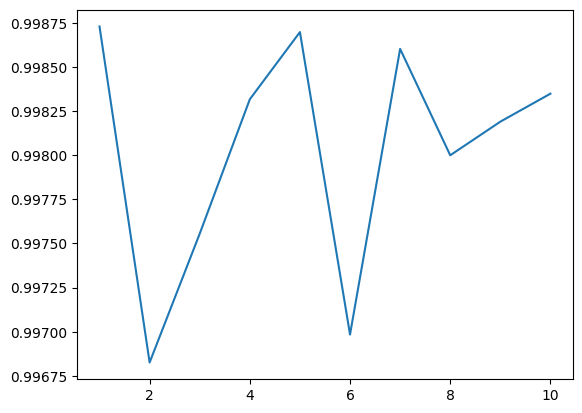

In [79]:
sns.lineplot(y = z.history['loss'],x = [i for i in range(1,11)])
sns.lineplot(y = z.history['accuracy'],x = [i for i in range(1,11)])


<Axes: ylabel='Loss/Accuracy'>

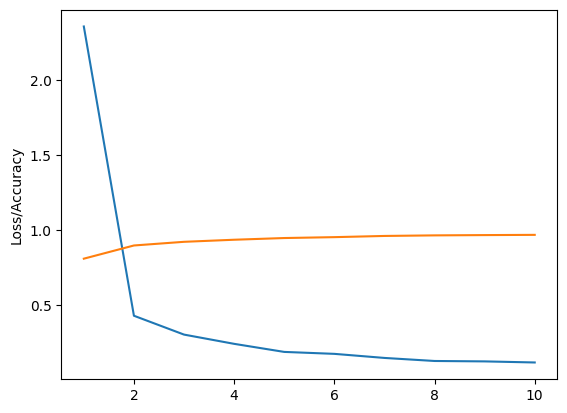

In [54]:
sns.lineplot(y = x.history['loss'],x = [i for i in range(1,11)])
sns.lineplot(y = x.history['accuracy'],x = [i for i in range(1,11)])


<Axes: >

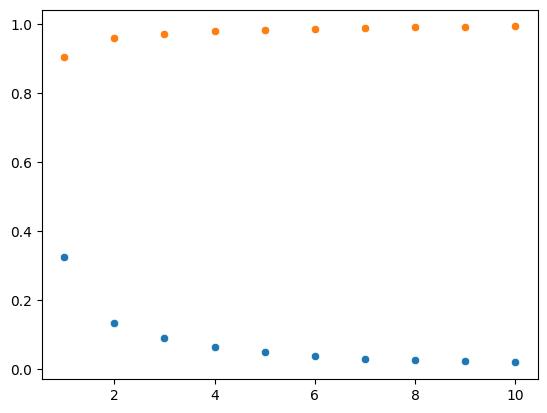

In [53]:
sns.scatterplot(y = y.history['loss'],x = [i for i in range(1,11)],)
sns.scatterplot(y = y.history['accuracy'],x = [i for i in range(1,11)])


In [30]:
test_in = pd.read_csv("C:\\Users\\ABHAS\\Downloads\\temp\\old projects and trash\\digit Recognizer\\digit-recognizer\\test.csv")

In [33]:
modely.evaluate(x = X_test_255,y=y_test_255)

329/329 [==============================] - 0s 1ms/step - loss: 0.0415 - accuracy: 0.9898


[0.041489843279123306, 0.989809513092041]

In [34]:
z

In [35]:
z.history['loss']

[0.3068300783634186,
 0.1295059472322464,
 0.08761337399482727,
 0.06663335859775543,
 0.05021730437874794,
 0.03982765972614288,
 0.029197294265031815,
 0.02873166836798191,
 0.019742673262953758,
 0.019377367570996284]

In [36]:
test = test_in/255

In [37]:
pred = modely.predict(test)

875/875 [==============================] - 1s 1ms/step


In [38]:
master_test = []
for i in range(test.shape[0]):
    master_test.append(test.iloc[i][:].to_list())


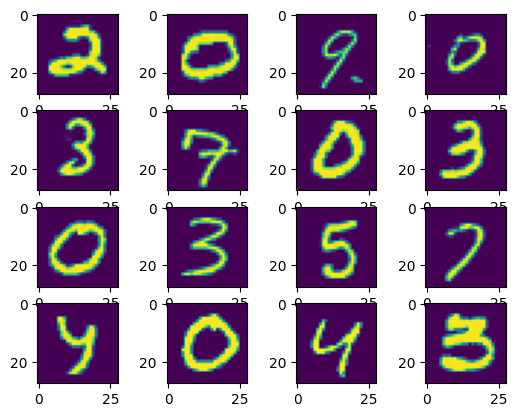

In [39]:
# np.random.shuffle(master)
for i in range(16):
        plt.subplot(4,4,i+1)
        img = np.array(master_test[i])
        img = img.reshape(28,28)
        plt.imshow(img)

In [126]:
l = np.argmax(pred,axis=1).tolist()

In [127]:
l

[2,
 0,
 9,
 9,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 8,
 9,
 2,
 3,
 5,
 9,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 8,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 5,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 2,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 0,


Some Personal optimisation

In [76]:
cols = data_train.columns

In [88]:
data_train.columns

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)

In [94]:
data_train_edit = data_train[cols].mask(df[cols] != 0,1)

In [99]:
X_train_01, X_test_01, y_train_01, y_test_01 = train_test_split(data_train_edit,data_train_label,test_size=0.3)

In [103]:
model01 = tf.keras.models.Sequential()
model01.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model01.add(tf.keras.layers.Dense(64,activation=tf.nn.relu))
model01.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))


model01.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics='accuracy')

In [105]:
mode = model01.fit(x=X_train_01,y=y_train_01,epochs=10)

Epoch 1/10
919/919 [==============================] - 2s 2ms/step - loss: 0.3390 - accuracy: 0.8965
Epoch 2/10
919/919 [==============================] - 2s 2ms/step - loss: 0.1501 - accuracy: 0.9532
Epoch 3/10
919/919 [==============================] - 2s 2ms/step - loss: 0.1067 - accuracy: 0.9661
Epoch 4/10
919/919 [==============================] - 2s 2ms/step - loss: 0.0799 - accuracy: 0.9740
Epoch 5/10
919/919 [==============================] - 2s 2ms/step - loss: 0.0606 - accuracy: 0.9807
Epoch 6/10
919/919 [==============================] - 2s 2ms/step - loss: 0.0470 - accuracy: 0.9842
Epoch 7/10
919/919 [==============================] - 2s 2ms/step - loss: 0.0375 - accuracy: 0.9883
Epoch 8/10
919/919 [==============================] - 2s 2ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 9/10
919/919 [==============================] - 2s 2ms/step - loss: 0.0318 - accuracy: 0.9890
Epoch 10/10
919/919 [==============================] - 2s 2ms/step - loss: 0.0229 - accuracy: 0.9923

In [108]:
pred01 = model01.evaluate(X_test_01,y_test_01)

394/394 [==============================] - 1s 1ms/step - loss: 0.1485 - accuracy: 0.9637


In [109]:
data_test_edit = test_in[cols].mask(df[cols] != 0,1)

In [110]:
pred01 = model01.predict(data_test_edit)

875/875 [==============================] - 1s 1ms/step


In [111]:
pred01

array([[0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.39406976, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [113]:
pred01 = np.argmax(pred01,axis=1)

In [117]:
print(pred01.tolist())

[2, 5, 9, 9, 7, 9, 0, 3, 0, 4, 5, 7, 7, 0, 4, 5, 7, 1, 4, 0, 5, 3, 4, 5, 7, 4, 2, 7, 1, 7, 7, 5, 4, 3, 6, 2, 4, 5, 1, 5, 7, 7, 7, 9, 5, 7, 8, 2, 8, 7, 6, 4, 1, 3, 4, 2, 5, 2, 2, 0, 4, 2, 7, 0, 0, 0, 9, 7, 0, 1, 6, 5, 5, 8, 3, 8, 5, 7, 2, 3, 5, 7, 5, 0, 9, 2, 4, 3, 4, 5, 2, 0, 6, 6, 1, 6, 3, 9, 7, 4, 2, 5, 1, 0, 7, 7, 6, 5, 0, 7, 6, 0, 4, 2, 1, 7, 8, 5, 5, 3, 3, 5, 2, 3, 6, 3, 8, 7, 8, 4, 3, 5, 5, 7, 4, 0, 3, 1, 5, 0, 4, 3, 4, 5, 5, 8, 7, 7, 2, 0, 4, 7, 5, 4, 3, 1, 7, 8, 7, 5, 3, 0, 4, 5, 1, 2, 7, 6, 4, 0, 2, 7, 8, 6, 1, 3, 5, 7, 1, 2, 7, 7, 5, 2, 4, 7, 2, 5, 6, 0, 6, 2, 4, 4, 6, 5, 4, 3, 6, 7, 1, 4, 7, 4, 9, 0, 8, 6, 4, 2, 0, 9, 3, 6, 7, 2, 1, 8, 5, 4, 2, 3, 1, 2, 2, 4, 4, 6, 1, 7, 0, 4, 7, 5, 7, 3, 2, 3, 0, 4, 4, 6, 2, 8, 5, 5, 4, 5, 4, 4, 7, 7, 9, 7, 8, 7, 5, 4, 4, 3, 6, 7, 2, 5, 7, 2, 6, 8, 7, 1, 5, 4, 6, 3, 5, 5, 1, 5, 3, 4, 0, 9, 7, 0, 5, 3, 7, 4, 9, 5, 5, 7, 7, 7, 7, 6, 5, 0, 3, 3, 6, 4, 5, 2, 6, 2, 7, 1, 4, 5, 6, 5, 9, 0, 0, 3, 8, 7, 7, 5, 4, 1, 1, 5, 5, 4, 5, 1, 9, 7, 2, 3, 1, 

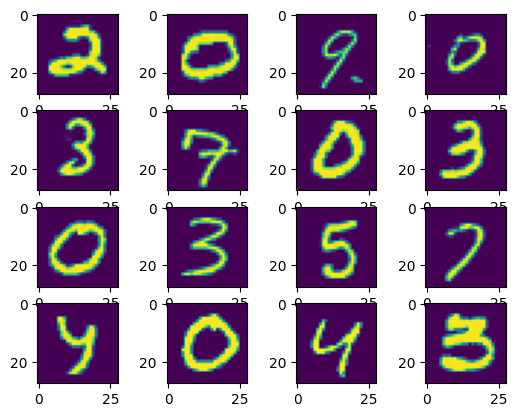

In [115]:
# np.random.shuffle(master)
for i in range(16):
        plt.subplot(4,4,i+1)
        img = np.array(master_test[i])
        img = img.reshape(28,28)
        plt.imshow(img)

In [137]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
l1 = []
for i in range(1,28001):
    l1.append(i)

In [140]:
submission = pd.DataFrame({'ImageId': l1,'Label' : l})

In [141]:
submission.to_csv("sub1.csv",index=False)